# DL ile İşaret Dilinde 0 ve 1 Rakamlarını Öğrenme

## Veri Seti

Details of datasets:
* Image size: 64x64
* Color space: Grayscale
* File format: npy
* Number of classes: 10 (Digits: 0-9)
* Number of participant students: 218
* Number of samples per student: 10

Deep Learning, Machine Learning tekniklerinden bir tanesidir. Deep Learning'in farkı feature'ları direk datadan öğrenir. Deep Learning modelleri, özellik mühendisliği (feature engineering) aşamasını minimize ederek, veriden özellikleri otomatik olarak öğrenir. Machine Learning'de ise feature'lardan yararlanarak modeller kurulur. Machine Learning, verilerin özelliklerini çıkarmak ve bu özellikleri kullanarak modeller oluşturmak için kullanılır. Deep Learning'de veriden direk model kurulur yani feature extraction(özellik çıkarma) yoktur. Deep Learning, veri tabanlı özellik çıkarmayı içerir. Ancak bu özellik çıkarma süreci otomatikleştirilmiş ve çok katmanlı sinir ağları tarafından gerçekleştirilir.

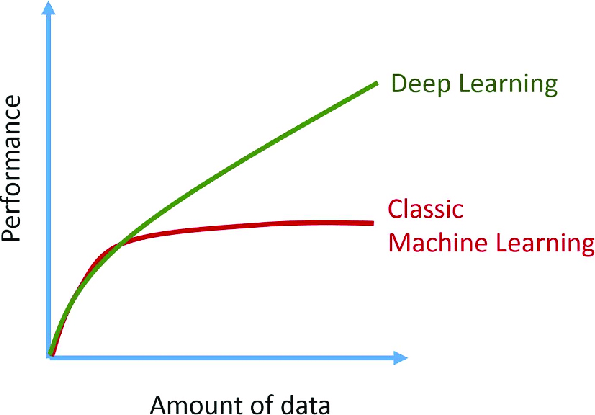

veri sayısının artmasına bağlı olarak Deep Learning'in performansı daha yüksektir.

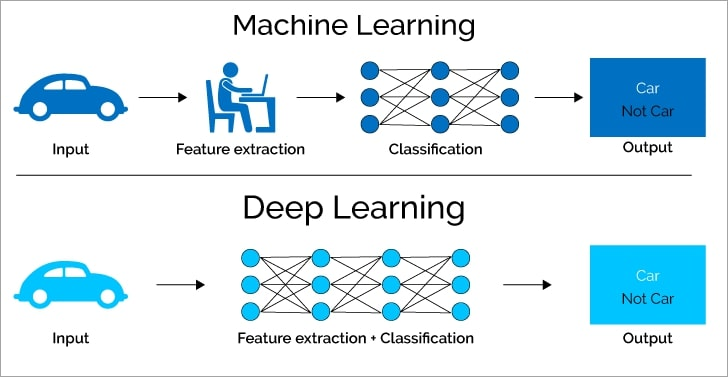

Deep Learning'in Machine Learning'den farkı:
* Deep Learning, Machine Learning'in bir alt kümesidir.
* Deep Learning, veriden özellikleri otomatik olarak öğrenir.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


* bu veri setinde 0,1,2,3,4,5,6,7,8,9 rakamlar bulunur. 
* bu rakamlardan sadece 0 ve 1'i sınıflandıralım. 
* 2062 tane image bulunur
* indeks 204'ten 408'e kadar 0'lardan oluşur. (205 adet 0 image bulunur)
* indeks 822'den 1027'ye kadar 1'lerden oluşur. (205 adet 1 image bulunur)

In [2]:
# x'in içerisinde resimler, y'in içerisinde resimlere karşılık gelen sayılar bulunur.
x_l = np.load("/kaggle/input/sign-language-digits-dataset/X.npy")
y_l = np.load("/kaggle/input/sign-language-digits-dataset/Y.npy")

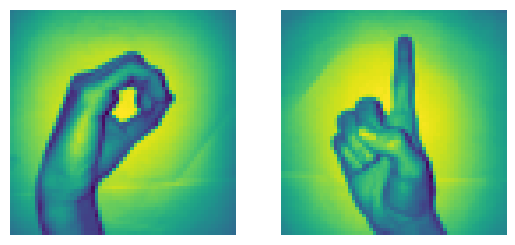

In [3]:
img_size = 64

plt.figure()

plt.subplot(1,2,1) # 1 plot olsun, 2 subplot, 1. subplot
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis("off")

plt.subplot(1,2,2) # 2. subplot
plt.imshow(x_l[900].reshape(img_size, img_size))
# 900. indeksteki resim
plt.axis("off")

plt.show()

In [4]:
# numpy array oluşturalım
# 0'lar ile 1'leri alt alta (axis=0) birleştirelim
# X'in içerisinde 0 ile 1'lerin resimleri var
# 205 tane 0 resimi, 205 tane 1 resimi var
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis=0)

In [5]:
# label/etiket
z = np.zeros(205)
o = np.ones(205)

# 0 ile 1'leri alt alta (axis=0) birleştir
# X dizisinin satır sayısı kadar satıra ve bir sütuna sahip 2D bir diziye dönüştürülüyor.
Y = np.concatenate((z,o), axis=0).reshape(X.shape[0],1)

print("X shape:", X.shape)
print("Y shape:", Y.shape) # vektör

X shape: (410, 64, 64)
Y shape: (410, 1)


* X shape: (410, 64, 64)
    * 205 + 205 = 410 tane resim var
    * 64x64'lük bir matrix: 1 resim

In [6]:
from sklearn.model_selection import train_test_split

# veri setinin %15'i test, %75 train için kullanılacak
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                   test_size=0.15,
                                                   random_state=42)
# random_state, her seferinde aynı veri setlerinin oluşmasını sağlar.

In [7]:
# 348 tane resim, her resim 64x64 matrix
X_train.shape

(348, 64, 64)

In [8]:
# 1. resim
X_train[0].shape

(64, 64)

In [9]:
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

print("number_of_train:", number_of_train)
print("number_of_test:", number_of_test)

number_of_train: 348
number_of_test: 62


In [10]:
# X_train veri setini 2 boyutlu hale getirelim
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])

print("X_train_flatten", X_train_flatten.shape)
print("X_test_flatten", X_test_flatten.shape)

X_train_flatten (348, 4096)
X_test_flatten (62, 4096)


* X_train'de 348 tane resim var.
* X_test'te 62 tane resim var.
* her bir resimin içerisinde 4096 (64x64) tane piksel vardır.
* her bir satır 1 resime karşılık gelir.

In [11]:
# çarpım yapabilmek için matrikslerin transpozunu alalım
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (4096, 348)
x_test: (4096, 62)
y_train: (1, 348)
y_test: (1, 62)


* x_train: (4096, 348) -> 4096 satır(her satır 1 piksel), 348 sütun yani 348 resim
* yani bir resim, 1 sütun ve 4096 satırdan oluşur.
* her bir sütun bir resime karşılık gelir.

## Logistic Regression

* Problem binary classification yani 0 ve 1 olmak üzere toplam 2 tane sınıf bulunmaktadır.
* Bu yüzden Logistic Regression algoritmasını kullanabiliriz. 
* Regresyon olarak adlandırılmasına rağmen, aslında bir sınıflandırma algoritmasıdır.
* Logistic Regression algoritması bir machine learning algoritmasıdır.
* Çok basit bir neural network'tür.

### Computation Graph
Matematiksel formülleri görselleştirmek için kullanırız.

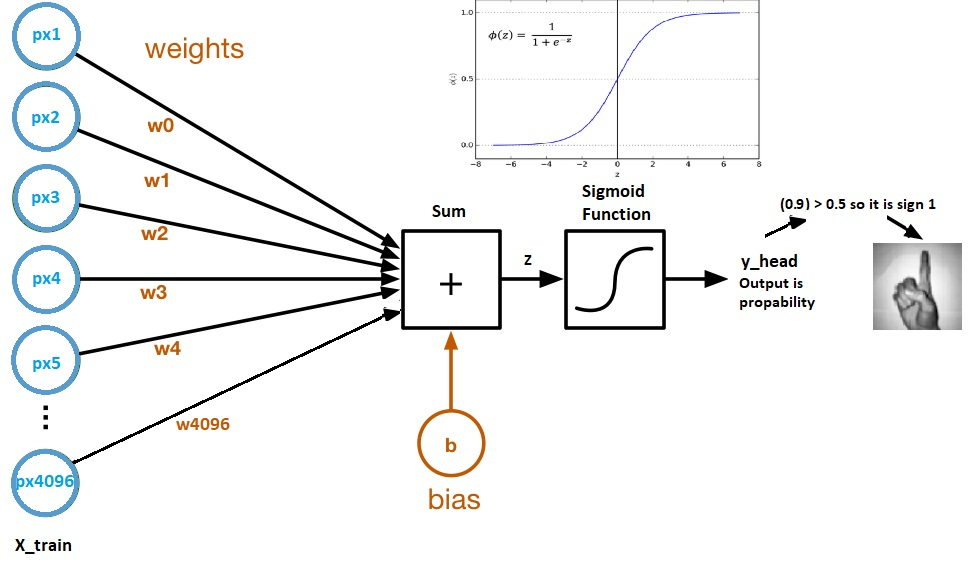
* Amaç modeli test ya da train etmektir. 
* Bunun için bir tane resim var. Bu resim 4096 pikselden oluşur.
* parametreler weights ile bias'tır.
* 4096 tane piksel var yani 4096 tane feature demektir, sütunlardır. Bunların hepsine ağırlık(weight/katsayı/coef) verilir ve hepsi kendine ait olan ağırlıklarla çarpılır ve sonra hepsi toplanır.
* bu toplama bias eklenir ve z elde edilir.
* z değerini sigmoid fonksiyonuna input olarak veririz.
* Sigmoid fonksiyonu, aktivasyon fonksiyonudur. z değerini 0 ile 1 arasında bir değere eşitler. Bu değer yani sigmoid fonksiyonundan çıkan değer olasılıksal(probabilistic) bir değerdir. 
* threshold yani eşik değer 0.5 ve probabilistic değer 0.9 olsun.
* 0.9 > 0.5 olduğundan tahmini değer 1'dir. yani %90 olasılıkla sonuç 1'dir.
* Sigmoid fonksiyonu türevi alınabilen bir fonksiyondur. Türev alınabildiği için ağırlıkları ve bias değerini güncelleyebiliriz.
* Bu modelde öğrenilen şeyler weight ve bias'tır.

Doğru veya yanlış bir tahmin yapmışsak tüm resimleri modele nasıl öğreteceğiz?

Bunun için weight'leri ve bias'ı güncellememiz lazım. Doğru veya yanlış bir tahmin yapmışsak geriye doğru gidilir, sigmoid'in türevi alınır sonrada lineer işlemin türevi alınır ve bias ve weigth güncellenir. sonraki resim güncellenmiş bias ve weigth'ler ile işleme tabii tutulur.

Weight ve bias'ın ilk değerleri ne olacak? (Initializing Parameters) Bunun için bazı teknikler kullanılır. Bu teknikleri ANN'de öğreneceğiz. Şu an ilk değer olarak weight'lere 0.01, bias'a 0 atayacağız.

### Forward Propagation

* Piksellerden cost fonksiyonuna kadar arasındaki işlemlerin toplamına Forward Propagation denir.
    * Forward Propagation z ile başlar. z, piksellerin weight'ler ile çarpılmış sonra bias ile toplanmış halidir.
    * z'yi sigmoid fonksiyonuna verilir ve olasılıksal bir sonuç elde edilir ve tahmini değer bulunur.
    * loss fonksiyonu hesaplanır. loss fonksiyonunun bir matematiksel formülü vardır. eğerki gerçek değer 1 ise ve tahmini değerde 1 olursa loss 0'dır ama gerçek değer yanlış tahmin edilirse loss değeri yüksek çıkar.

loss fonksiyonu

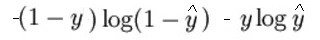

Her bir resim için loss değeri elde edilir ve bu loss değerlerinin hepsi toplanır. Bu toplama **cost** denir. Cost değeri çok yüksekse model kötüdür.

348 tane resim var dolayısıyla 348 tane loss değeri var. Bu loss değerlerini toplayıp cost değerini bulacağız. Eğer cost değeri çok yüksekse weight'ler ile bias güncellenir ve cost değeri azaltılmaya çalışılır.

weight'ler ile bias, gradient descent algoritmasını kullanılarak optimize edilir. optimize etmek, cost değerine göre en uygun değerlerini bulmak demektir. Bu process'in adı, en sondan en başa gitmenin adı Backward Propagation'dır. Backward Propagation'ın amacı parametreleri (weights ile bias) güncellemektir.

### Backward Propagation - 1

Forward propagation tamamlandı ve cost değeri elde edildi. cost değeri eğer yüksekse weights ile bias değerlerini güncelleriz bu sürece Backward Propagation denir.
Cost değerinden başlar geriye doğru gider, weight'leri ve bias'ı günceller.
Backward Propagation yaparken kullanacağımız metodun ismi gradient descent'dir.

#### Gradient Descent ile Optimizasyon
Gradient Descent (dereceli azalma) ile parametrelerin en uygun değerleri bulunur. Cost'u en az yapacak optimize parametreleri bulmalıyız.

* cost'un yüksek olması çok fazla yanlış tahmin yaptığımız anlamına gelir. cost'u azaltmak için weight'leri ve bias'ı güncellemeliyiz.

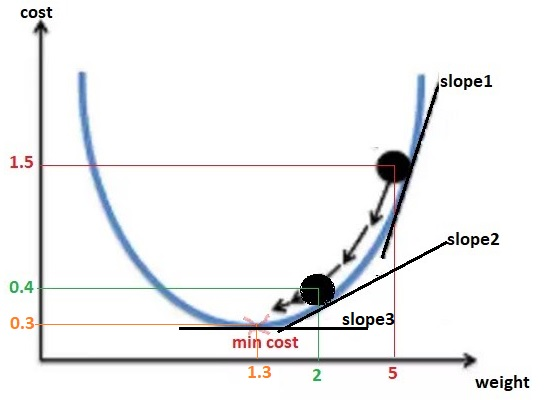

* cost'un minimum noktası vardır ama sıfır olamaz.
* weight 5 ise cost 1.5 olmuş.
* amaç cost fonksiyonunun minimumuna gelmektir bu yüzden weight'i güncelleyelim
* w := w - step
* step, slope'dur ve slope, eğim demektir.
* (5, 1.5) noktanın cost fonksiyonunu dik kestiği line, noktanın fonksiyona göre eğimidir yani slope'dur yani step'dir.
* slope1 3 olsun. weight güncellenir weight 2 oldu.
* weight güncellendiğinden tekrar forward propagation yapılır.
* cost değeri tekrar bulunur minimum olmadığından tekrar eğim alınır ve slope2 değeri bulunur ve stepte yerine yazılarak güncellenmış weight değeri elde edilir.
* weight güncellendiğinden tekrar forward propagation yapılır.
* minimum cost değeri bulunur ama cost'un minimum değeri olduğunu bilmediğimiz için slope değerini buluruz slope yani eğim 0 ise minimum noktaya ulaştığımızı gösterir. cost fonksiyonunun minimum noktasını bulmuş oluruz
* Bir fonksiyonun belirli bir noktasındaki eğim veya slope değerini bulmak, o noktadaki fonksiyonun türevini almak anlamına gelir.

### Backward Propagation - 2

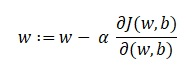

* cost fonksiyonunun weight ve bias'a göre türevinin alfa değeri ile çarpılması sonucu step değeri elde edilir.
* bias'ı güncellemek içinde bu fonksiyonu kullanırız. (b := b - step)
* alfa değeri, learning rate şeklinde adlandırılır.
* learning rate, öğrenme hızı yani öğrenme oranıdır.
* learning rate'in optimum değerini seçmemiz lazım. eğer küçükse çok zaman alır, yüksekse hiçbir zaman optimum w veya b değerini bulamayız.
* learning rate bir hiperparametredir yani tune edilir. tekrar tekrar değiştirerek optimum değer bulunmaya çalışılır. 
* w ile b güncellenen parametrelerdir, learning rate ise tune edilir.

Cost fonksiyonun weight ile bias'a göre türevi:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}x(  y_h - y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (y_h - y)$$

* $y_h$: y'nin tahmini değeri
* y: gerçek değer
* T: transpoz
* m: toplam resim/örnek sayısı
* x: bir resmin bütün pikselleri

## Logistic Regression: Kodlama

In [12]:
## Parametrelere ilk değerlerini atıyalım
# 384 tane resim/örnek (sütun)
# her resmin 4096 tane pikseli var (satır)

In [13]:
# pikselleri weight'lerle çarpmak ve bias ile toplamak için
# weight'lerle bias'ın başlangıç değeri olması gerekiyor
# weight başlangıç değeri 0.01, bias başlangıç değeri 0 olsun

In [14]:
# her resmin 4096 tane pikseli var (satır)
# resmin her bir pikseli weight değeri ile çarpılacak
# dolayısıyla piksel kadar weight olması gerekiyor
# her resim için 1 tane bias değeri gereklidir

def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1), 0.01) # 4096 satır, 1 sütun
    # 4096x1 boyutlu bir matris oluşturur. Bu matrisin tüm elemanları 0.01'dir.
    b = 0.0
    return w, b

In [15]:
w,b = initialize_weights_and_bias(4096)

In [16]:
w[:3] # 4096 satır, 1 sütun

array([[0.01],
       [0.01],
       [0.01]])

In [17]:
w.shape

(4096, 1)

In [18]:
#  Forward Propagation

In [19]:
# sigmoid fonksiyonu, z değerini 0 ile 1 arasında bir değere çevirecek
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z)) # exp(-z): e üzeri -z
    return y_head # tahmini değer, olasılıksal bir değerdir

In [20]:
# z = w * px + b veya z = np.dot(w.T, x_train) + b
# z değeri sigmoid fonksiyonuna verilir. y_head değeri bulunur
# sigmoid'den çıkan değerler(y_head) loss fonksiyonuna gidecek
# loss değerleri toplanır cost değeri elde edilir
# y_train gerçek değerler, y_head tahmini değerler

def forward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b # weight'lerle ve piksellerin çarpımı, bias ile toplamı
    y_head = sigmoid(z) # olasılıksal bir değerdir
    loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    return cost

In [21]:
# Backward Propagation

In [22]:
# cost fonksiyonunun weight ve bias'a göre türevini alınır
# weight ile bias güncellenir.

In [23]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T, x_train) + b # np.dot: matriks çarpımı
    y_head = sigmoid(z) # olasılıksal değer %80 1'dir, tahmini değer
    # y_train gerçek değer
    loss = - y_train * np.log(y_head) - (1 - y_train)* np.log(1 - y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    # backward propagation
    # weight'leri ile bias'ları güncelleyebilmek için cost fonksiyonunun weight ve bias'a göre türevini almalıyız.
    # türevini aldığımızda oluşan fonksiyonların kodları:
    derivative_weight = (np.dot(x_train, ((y_head - y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train)/x_train.shape[1]
    
    gradients = {"derivative_weight": derivative_weight,
                 "derivative_bias": derivative_bias}
    
    return  cost, gradients

In [24]:
# Parametreleri Güncelleyelim

In [25]:
# weight'leri ile bias'ları güncelleyeceğiz
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    # görselleştirmek için kullanacağım
    cost_list = []
    cost_list2 = []
    index = []
    
    # number_of_iteration, forward_backward_propagation kaç kere tekrarlanacak
    for i in range(number_of_iteration):
        cost, gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        parameters = {"weight":w, "bias":b}
        
        # gradients metoduyla w ve b güncellenir
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        
        if i % 10 == 0: # 10 adımda bir cost kaydedilir
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i, cost))
            
    # görselleştirelim
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation="vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    
    return parameters, gradients, cost_list

In [26]:
# Prediction

In [27]:
# tahmini değerler
def predict(w,b,x_test):
    z = np.dot(w.T, x_test) + b
    Y_head = sigmoid(z) # olasılıksal tahmini sonuç geri dönderir
    Y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(Y_head.shape[1]):
        if Y_head[0,i] <= 0.5:
            Y_prediction[0,i] = 0 # bu resim bir 0'dır.
        else:
            Y_prediction[0,i] = 1 # bu resim bir 1'dir.
            
    return Y_prediction

In [28]:
# Lojistik Regresyon

In [29]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, number_of_iteration):
    dimension = x_train.shape[0] # 4096 tane piksel
    w, b = initialize_weights_and_bias(dimension) # ilk değerler atanır.
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, number_of_iteration)
    
    y_prediction_train =predict(parameters["weight"], parameters["bias"], x_train)
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    
    # 100'de kaçını doğru tahmin etti ?
    print("train accuarcy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuarcy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))    

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


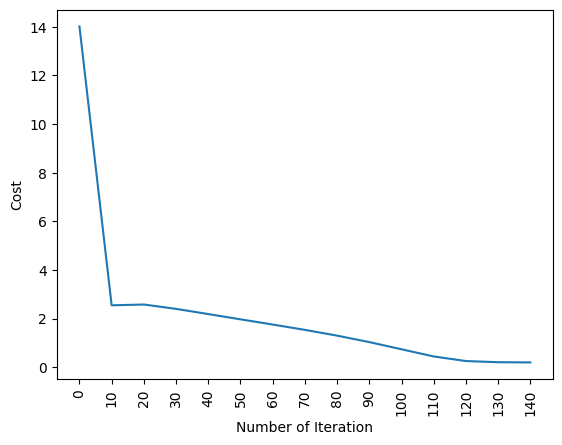

train accuarcy: 92.816091954023 %
test accuarcy: 93.54838709677419 %


In [30]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 0.01, number_of_iteration = 150)

* 150 kez update metodu çağrılıyor, weight ile bias cost'a göre güncelleniyor.
* cost azalıyor.

* train accuarcy: 92.816091954023 %
* test accuarcy: 93.54838709677419 %

İkisi birbirine çok yakın olması ve test değerinin yüksek olması modelin resimleri ezberlemediği anlamına gelir. Tahminler doğru yapılmıştır.

## Sklearn ile Lojistik Regresyon

In [31]:
from sklearn import linear_model

# model oluşturuldu
logreg = linear_model.LogisticRegression(random_state=42, max_iter=150) 
# modeli eğitelim
log_reg = logreg.fit(x_train.T, y_train.T)

print("train accuarcy: {}".format(log_reg.score(x_train.T, y_train.T)))
print(" test accuarcy: {}".format(log_reg.score(x_test.T, y_test.T)))

train accuarcy: 1.0
 test accuarcy: 0.967741935483871


Accuarcy değerleri bulduğumuzdan farklı. Çünkü lojistik regresyon yöntemi, farklı optimizasyon parametreleri veya düzenlileştirme(regularization) gibi bizim kullanmadığımız birçok farklı özelliği kullanır. Bu parametrelerin default değerlerini kullanıyoruz.

## Artificial Neural Network (ANN)
* Yapay Sinir Ağları
* ANN (Artificial Neural Network), derin öğrenme (deep learning) alanının bir alt dalıdır. 
* input ile output layer'ın arasında en az bir tane hidden layer bulunur.
* derinlik kavramını oluşturan şey hidden layer sayısıdır.
* 1 resim, 1 hidden layer ve 1 tane output var.
* 3 layer var fakat 2 layer vardır, şeklinde söylenir. Çünkü input layer söylenmez.

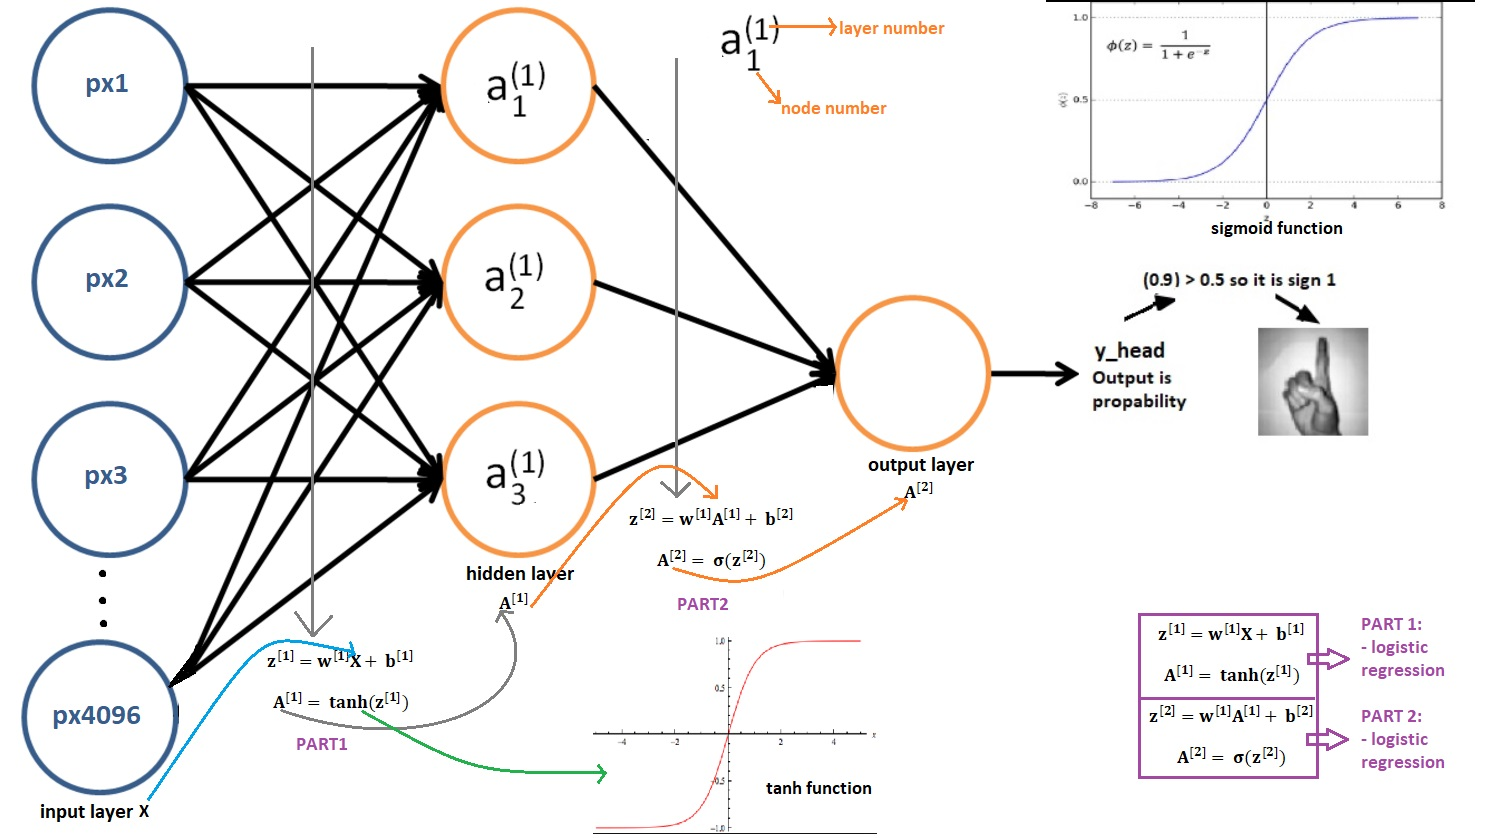

* 2 layer'lık bir ANN
* input ve output layer'ın arasında 1 tane hidden layer bulunur.
* bir resimde 4096 tane piksel vardır dolayısıyla input layer 4096 tane node'dan oluşur.
* hidden layer'da 3 tane node vardır ve output layer'da 1 tane node vardır. Bu node sayılarını rastgele seçtim.
* node ve hidden layer sayıları hiperparametredir.
* Hiperparametrelerin seçilmesi ve ayarlanması, optimize edilmesi gereken bir süreçtir. Bu hiperparametrelerin en iyi değerlerini bulmalıyız.
* part1'de 
    * z1 = w1 * px + b1
    * A1 = tanh(z1)
    * tanh, -1 ile 1 arasına değerleri sıkıştırır.
    * tanh fonksiyonunun ortalaması(mean) sıfıra daha yakındır bu da verinin daha iyi merkezde tutulduğu anlamına gelir yani yanlı bir veri olmasını engeller. (sigmoid fonksiyonunun ortalaması(mean) 0.5'dir)
* A1 değerleri hidden layer'daki değerler: $a_1 ^ 1$ üstteki sayı 1. hidden layer demektir.
* part2'de
    * z2 = w2 * A1 + b2
    * b2: 2. layer için gerekli olan b
    * A2 = sigmoid(z2)
* Output layer: A2 (A2, 2. layer'da)
* Aktivasyon fonksiyonları, sinir ağlarının her katmanında nonlinearity ekleyerek, modelin daha karmaşık işlevleri öğrenmesine olanak tanır. Bu, sinir ağlarının daha genel ve daha etkili özellikler öğrenmesine yardımcı olabilir.
* part1 ve part2'de toplam 2 tane weight var. 
* Güncellemem gereken parametreler weight ve bias'tır.
* w2: 2. layer'ın weight'leri anlamına gelir.
* Forward propagation, loss'lar bulunur ve toplanır cost elde edilir. 
* cost fonksiyonunun türevi alınır ve w ve b güncellenir. cost, sıfıra yaklaştığında min cost değerini buluruz.

### 2 Layer Neural Network
* layer boyutunu yani node sayısı belirlenecek, weight ve bias'ın ilk değerleri atanacak.
* Forward propagation
* Loss fonksiyonu ve cost fonksiyonu bulunacak
* Backward propagation
* Parametreler güncellenecak
* weight ve bias parametreleriyle tahmin yapılacak
* Model oluşturulacak

#### Layer boyutunu belirleyelim ve weight ile bias'a ilk değerlerini atıyalım

* Güncellenmesi gereken parametreler: w1, b1, w2 ve b2
* Layer boyutu: a1, a2 ve a3 olmak üzere 3 tane node var. (1. layer/ 1. hidden layer)

In [32]:
# bias'ın ilk değeri 0 olsun, weight'in ise random bir sayı olsun
# random olmasının nedeni çeşitlilik olması, farklı şeyleri öğrenmesi için
# layer boyutu 3'dü

# z = w * px + b
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3, x_train.shape[0]) * 0.1, # (3, 4096)
                  # (3, 4096) * (4096, 1) = w1 * px = (3, 1) 3 tane node olduğu için (1 tane node ise (1, 1))
                  # A1: (3, 1) olur
                  "bias1": np.zeros((3, 1)), # 3 node olduğundan, toplama yapabilmek için
                  # z1 = w1 * px + b1 = (3, 4096) * (4096, 1) + (3, 1) = (3, 1)
                  # A1 = tanh(z1)
                  
                  # (1, 3) * (3, 1) = w2 * A1 = (1, 1) = A2
                  "weight2": np.random.randn(y_train.shape[0], 3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0], 1))} # (1, 1) = b2
                  # z2 = w2 * A2 + b2 = (1, 3) * (3, 1) + (1, 1) = (1, 1)
                  # A2 = sigmoid(z2)
    
    return parameters

#### Forward propagation

In [33]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"], x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], A1) + parameters["bias2"]
    A2 = sigmoid(Z2) # 1 ile 0 arasında bir olasılıksal sonuç elde edilir
    # eşik değeri 0.5 yapıp binary classification yapacağız A2>th -> 1
    
    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}
    
    return A2, cache

#### Loss Fonksiyonu ve Cost Fonksiyonu
Cross entropy function:

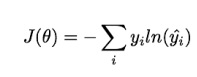

In [34]:
# cost'u hesaplayalım
def compute_cost_NN(A2, Y): # tahmini değer, gerçek değer
    logprobs = np.multiply(np.log(A2), Y) # log(tahmini değer) * gerçek değer
    cost = - np.sum(logprobs)/Y.shape[1] # çarpımlar toplanır ve normalize edilir
    return cost

#### Backward Propagation

Bu bölümde, w1, w2, b1 ve b2 değerleri güncellenecektir.

Cost fonksiyonunun weight ve bias parametrelerine göre türevleri hesaplanacak, ardından weight ve bias güncellenecektir.

In [35]:
# cost fonksiyonundan w1'e gidebilmek için, cost'un w1'e göre türevini, değişimini bulabilmek için
# ara step'lerin türevlerinide almalıyız
# bias içinde aynısıdır

def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache["A2"] - Y # cost'un z2'ye göre türevi
    dW2 = np.dot(dZ2, cache["A1"].T) / X.shape[1]
    db2 = np.sum(dZ2, axis=1, keepdims = True) / X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T, dZ2) * (1 - np.power(cache["A1"], 2)) # cost'un z1'e göre türevi
    dW1 = np.dot(dZ1, X.T) / X.shape[1] # cost'un w1'e göre türevi
    db1 = np.sum(dZ1, axis = 1, keepdims=True) / X.shape[1] # keepdims: sum işleminin sonucunu array içerisinde tutması için
    
    # layer sayısı arttıkça bu denklemlerin karmaşıklığı artar.
    
    # cost'un parametrelere göre türevleri
    grads = {"dweight1":dW1,
             "dbias1":db1,
             "dweight2":dW2,
             "dbias2":db2}
    
    return grads # update metodunda kullanılacak

#### Parametreleri Güncelleyelim

In [36]:
# grads: cost'un parametreye göre türevi, değişimi
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters_ = {"weight1": parameters["weight1"] - learning_rate * grads["dweight1"],
                  "bias1": parameters["bias1"] - learning_rate * grads["dbias1"],
                  "weight2": parameters["weight2"] - learning_rate * grads["dweight2"],
                  "bias2": parameters["bias2"] - learning_rate * grads["dbias2"]}
    
    return parameters_

#### Bulunan weight ve bias parametreleriyle tahmin yapılacak

In [37]:
def predict_NN(parameters, x_test):
    A2, cache = forward_propagation_NN(x_test, parameters)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0,i] <= 0.5: # A2 tahmini değerdir, olasılıksal bir değerdir
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
            
    return Y_prediction

#### ANN modeli

* x_train ve y_train weight'leri ve bias'ları güncellemek için gereklidir.
* x_test ve y_test ile bulunan parametreleri test ederiz
* num_iteration öğrenme süreci kaç kez tekrarlansın

In [38]:
# 2 - Layer Neural Network
def two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations):
    # görselleştirmek için
    cost_list = []
    index_list = []
    
    # parametrelere ilk değerleri atanır ve layer boyutu(node sayısı(3)) belirlenir.
    # x_train ve y_train'in boyutunu alarak weight ve bias'ın boyutu belirlenir
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    
    for i in range(0, num_iterations):
        # forward propagation
        A2, cache = forward_propagation_NN(x_train, parameters)
        # cost hesaplanır
        # A2 yani y_head olasılıksal tahmini değer, y_train ise gerçek değer
        cost = compute_cost_NN(A2, y_train)
        # backward propagation 
        # cost'un parametrelere göre türevleri yani değişimleri bulunur
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        # parametreler güncellenir
        parameters = update_parameters_NN(parameters, grads)
        
        # her 100 adımda bir cost değerini sakladım
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print("Cost after iteration %i: %f" %(i, cost)) # her 100 adımda bir cost'u yazdırdım
            
    # cost'un değişimini görselleştirdim
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation="vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    
    # model oluşturuldu
    # tahmin yapalım
    y_prediction_test = predict_NN(parameters, x_test)
    y_prediction_train = predict_NN(parameters, x_train)
    
    # train/test accuracy
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    return parameters

Cost after iteration 0: 0.405577
Cost after iteration 100: 0.365201
Cost after iteration 200: 0.349903
Cost after iteration 300: 0.344284
Cost after iteration 400: 0.332027
Cost after iteration 500: 0.302551
Cost after iteration 600: 0.259086
Cost after iteration 700: 0.218577
Cost after iteration 800: 0.186048
Cost after iteration 900: 0.160870
Cost after iteration 1000: 0.141218
Cost after iteration 1100: 0.125577
Cost after iteration 1200: 0.348948
Cost after iteration 1300: 0.104051
Cost after iteration 1400: 0.094990
Cost after iteration 1500: 0.087357
Cost after iteration 1600: 0.080933
Cost after iteration 1700: 0.075623
Cost after iteration 1800: 0.071238
Cost after iteration 1900: 0.067537
Cost after iteration 2000: 0.064291
Cost after iteration 2100: 0.061289
Cost after iteration 2200: 0.058370
Cost after iteration 2300: 0.055383
Cost after iteration 2400: 0.052165


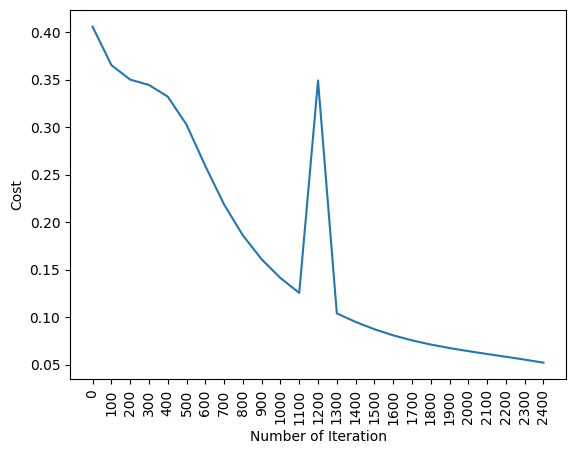

train accuracy: 99.13793103448276 %
test accuracy: 93.54838709677419 %


In [39]:
# 2500 kez weight'ler ve bias'lar güncellensin
parameters = two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations = 2500)

* 2 tane layer'ı olan neural network oluşturuldu
    * layer boyutunu(node sayısı) belirlendi
    * weight ve bias'a ilk değerleri atandı
    * Forward propagation
    * Loss fonksiyonu ve cost fonksiyonu bulundu
    * Backward propagation
    * Backward propagation sonucu oluşan gradient'lerle parametreler güncellendi
    * En son bulunan, yani öğrenilen parametrelerle tahmin yapıldı
    * model oluşturuldu

## L - Layer Neural Network

Deep learning modelini daha fazla genelleştirmek için layer sayısı, node sayısı gibi hiperparametreleri seçelim.

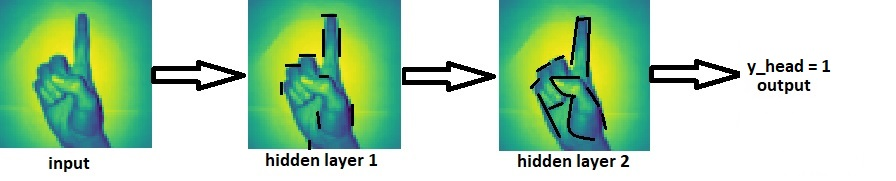

* Hidden layer sayısını artıralım
    * Eğer hidden layer sayısı az ise bu hidden layer'lar resimin belirli başlı basit bileşenlerini keşfederler.
    * hidden layer1 resimdeki basit şekilleri keşfeder. örneğin düz çizgileri keşfeder.
    * layer sayısı arttıkça karmaşık şekilleri öğrenmeye başlar. örneğin daire, çember gibi. Parmakları ayırt edebilir.
    * hidden layer sayısı arttıkça keşfettiği karmaşıklık artar yani deep learning'deki deep yani derinlik arttıkça daha karmaşık şeyleri, eğrileri keşfetmeye başlar yani nonlinearity artar. Resimdeki karmaşıklığı keşfeder, daha iyi öğrenmiş olur.

* Oluşturacağım Model
    * number of iterations, hidden node sayısı(number of hidden units), hidden layer sayısı (number of hidden layer), aktivasyon fonksiyonları(activation functions) ve learning rate bunlar seçilmesi gereken hiperparametredir.
    * 2 hidden layer olacak 1. hidden layer'da 8 ve 2. hidden layer'da 4 tane node olacak
    * 2 tane hidden layer ve 1 tane output layer olacak şekilde 3-layer neural network oluşturacağım
    * hidden layer node sayısı ve hidden layer sayısı arttıkça karmaşıklık artar
    * aktivasyon fonksiyonu olarak 2 tane relu ve 1 tane sigmoid(output layer'da) kullanacağız. sigmoid kullanmamın nedeni binary classification
    * relu diğer fonksiyonlara göre daha hızlıdır. çünkü türevinin alınması daha kolaydır.
    * number of iterations, 100 olsun.
    * keras kullanılacak.

In [40]:
# keras ile
# x_train, x_test, y_train, y_test bunlar yeniden boyutlandırılır, transpozu alınır
# çünkü keras'ta kullanırken transpozunu almamız gerekiyor.
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

### Keras Kütüphanesini Kullanarak ANN Oluşturalım

In [41]:
# kütüphanelerim
# keras ile veri setini sınıflandırmak için
from keras.wrappers.scikit_learn import KerasClassifier
# cv = 2 ise cross validation veri setini 5'e böler, 
# 4'ünü train veri seti, 1'ini test olarak kabul eder
# bu işlemi 5 kez art arda tekrarlıyor
# 5 farklı train ve test veri seti tanımlar
# bunların her birisinin accuarcy değerini bulur
# bu accuarcy değerlerinin ortalamasını alarak ortalama bir accuarcy değeri elde etmiş olur
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # model oluşturmak için
# Dense ise layer'ları oluşturmak için kullanırız
from keras.layers import Dense

* sigmoid input değerini 0 ile 1 arasında sınırlandırır.
* relu, input değeri 0'dan küçükse 0 geri dönderir. Eğer input 0'dan büyükse relu input değerini geri dönderir.

In [42]:
def build_classifier(): # neural network'ü oluşturmak için
    classifier = Sequential() # bir neural network oluşturdum
    # Dense ile layer oluşturdum
    classifier.add(Dense(units = 8, # layer'daki node sayısı
                         kernel_initializer = "uniform", # weight'lere ilk değerini atar, random sayı atanır
                        activation="relu",
                        input_dim = x_train.shape[1])) # input boyutu, piksel sayısı
    # 2. hidden layer
    classifier.add(Dense(units = 4,
                         kernel_initializer = "uniform",
                        activation="relu"))
    # output layer
    classifier.add(Dense(units = 1,
                         kernel_initializer = "uniform",
                        activation="sigmoid"))
    # forward propagation tamamlandı loss ve cost fonksiyonu kaldı
    # sınıflandırma algoritmasını derlemek için gerekli olan optimizasyon parametreleri
    # binary_crossentropy lojistik regresyonda kullanılan loss'tur.
    # önceden learning_rate sabit tutarak gradient discent yapılıyordu
    # back propagation yani optimizer adam(adaptive momentum) ise learning_rate sabit kalmaz
    # ve daha hızlı öğrenmesine neden olur, memory'i daha efektif kullanmamızı sağlar
    # oluşturduğum bu modeli accuarcy ile değerlendireceğim
    classifier.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    
    return classifier

In [43]:
# oluşturduğum neural network'ü kullanmak için KerasClassifier metodunu kullanacağım
# epochs: number of iteration
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)

In [44]:
# modeli eğitelim
# cross_val_score, birden fazla accuracy verir
# cv = 3 ise 3 kez accuracy bulur 
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5259
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5431
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5431
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5431
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5431
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5431
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.5431
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5431
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.5431
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5431
Epoch 11/100
8/8 [===========

In [45]:
# bu accuracy'lerin ortalaması
mean = accuracies.mean()
# bu accuracy'lerin standart sapma değeri
std = accuracies.std()

print("Accuracy mean: " + str(mean))
print("Accuracy std: " + str(std))

Accuracy mean: 0.9339080452919006
Accuracy std: 0.03542765023506224
